In [1]:
# The code was removed by Watson Studio for sharing.

In [71]:
PARIS_COORDINATES = [48.866667, 2.333333]
FOURSQUARE_CATEGORY = '4bf58dd8d48988d1ce941735' #category for seafood restaurants, see https://developer.foursquare.com/docs/build-with-foursquare/categories/
FOURSQUARE_RADIUS = 1500 #Radius that should allow to cover every neighborhood
FOURSQUARE_LIMIT = 100
FOURSQUARE_UPDATE = True #Do we search the data in Foursquare or do we use the local data? This field is useful to avoid reaching the maximum queries per day

In [3]:
# The code was removed by Watson Studio for sharing.

## Get data about Paris neighborhoods

Le quartier désigne la division administrative de l’arrondissement. Chaque arrondissement est découpé
en quatre quartiers administratifs. Paris compte ainsi quatre-vingt quartiers administratifs.

https://en.wikipedia.org/wiki/Demographics_of_Paris#/media/File:Paris_Historical_Population.png

ATTENTION AU COPIE DE DF VS NOUVEAU DF => REVOIR COURSERA

### Import libraries

In [4]:
import pandas as pd
print('pandas library imported.')
import numpy as np
print('numpy library imported.')
import requests
print('requests library imported.')
from bs4 import BeautifulSoup
print('BeautifulSoup library imported.')
import json
print('json imported.')

print('All libraries imported.')

pandas library imported.
numpy library imported.
requests library imported.
BeautifulSoup library imported.
json imported.
All libraries imported.


### Get the data about neighborhoods of Paris

Get a csv from the site of the City of Paris: https://opendata.paris.fr/explore/dataset/quartier_paris/export/

In [5]:
!wget --quiet https://opendata.paris.fr/explore/dataset/quartier_paris/download/?format=csv -O paris_neighborhoods.csv

print('CSV file downloaded.')

CSV file downloaded.


In [6]:
paris_neighborhoods = pd.read_csv('paris_neighborhoods.csv', sep=';')

print('The dataframe shape is {}.'.format(paris_neighborhoods.shape))

paris_neighborhoods.head()

The dataframe shape is (80, 10).


,n_sq_qu,c_qu,c_quinsee,l_qu,c_ar,n_sq_ar,perimetre,surface,geom_x_y,geom
0,750000021,21,7510601,Monnaie,6,750000006,2391.122818,2.933606e+05,"48.8543844036,2.34003537113","{""type"": ""Polygon"", ""coordinates"": [[[2.343168..."
1,750000022,22,7510602,Odéon,6,750000006,3516.314464,7.161484e+05,"48.8478006293,2.33633882759","{""type"": ""Polygon"", ""coordinates"": [[[2.336988..."
2,750000029,29,7510801,Champs-Elysées,8,750000008,5480.652870,1.140254e+06,"48.8670744922,2.30865168468","{""type"": ""Polygon"", ""coordinates"": [[[2.306463..."
3,750000051,51,7511303,Maison-Blanche,13,750000013,6814.373288,2.231506e+06,"48.8231278057,2.35243314954","{""type"": ""Polygon"", ""coordinates"": [[[2.349115..."
4,750000052,52,7511304,Croulebarbe,13,750000013,3289.230480,6.920677e+05,"48.8337336761,2.34767304607","{""type"": ""Polygon"", ""coordinates"": [[[2.351662..."


In [7]:
project.save_data(file_name='paris_opendata.csv', data=paris_neighborhoods.to_csv(index=False), overwrite=True)

print('File paris_opendata.csv saved.')

File paris_opendata.csv saved.


### Cleaning the dataframe

Drop the columns we will not use

In [8]:
paris_neighborhoods.drop(['n_sq_qu', 'geom', 'n_sq_ar'], axis='columns', inplace=True)

print('The dataframe shape is {}.'.format(paris_neighborhoods.shape))
paris_neighborhoods.head()

The dataframe shape is (80, 7).


,c_qu,c_quinsee,l_qu,c_ar,perimetre,surface,geom_x_y
0,21,7510601,Monnaie,6,2391.122818,2.933606e+05,"48.8543844036,2.34003537113"
1,22,7510602,Odéon,6,3516.314464,7.161484e+05,"48.8478006293,2.33633882759"
2,29,7510801,Champs-Elysées,8,5480.652870,1.140254e+06,"48.8670744922,2.30865168468"
3,51,7511303,Maison-Blanche,13,6814.373288,2.231506e+06,"48.8231278057,2.35243314954"
4,52,7511304,Croulebarbe,13,3289.230480,6.920677e+05,"48.8337336761,2.34767304607"


Rename the columns

In [9]:
paris_neighborhoods.columns = ['NeighborhoodNumber', 'NeighborhoodCode', 'Neighborhood', 'DistrictNumber', 'Perimeter', 'Area', 'Coordinates']

print('The dataframe shape is {}.'.format(paris_neighborhoods.shape))
paris_neighborhoods.head()

The dataframe shape is (80, 7).


,NeighborhoodNumber,NeighborhoodCode,Neighborhood,DistrictNumber,Perimeter,Area,Coordinates
0,21,7510601,Monnaie,6,2391.122818,2.933606e+05,"48.8543844036,2.34003537113"
1,22,7510602,Odéon,6,3516.314464,7.161484e+05,"48.8478006293,2.33633882759"
2,29,7510801,Champs-Elysées,8,5480.652870,1.140254e+06,"48.8670744922,2.30865168468"
3,51,7511303,Maison-Blanche,13,6814.373288,2.231506e+06,"48.8231278057,2.35243314954"
4,52,7511304,Croulebarbe,13,3289.230480,6.920677e+05,"48.8337336761,2.34767304607"


Split the coordinates in 2 columns

In [10]:
paris_neighborhoods[['Latitude', 'Longitude']] = paris_neighborhoods.Coordinates.str.split(",", expand=True)
paris_neighborhoods.drop(['Coordinates'], axis='columns', inplace=True)

print('The dataframe shape is {}.'.format(paris_neighborhoods.shape))
paris_neighborhoods.head()

The dataframe shape is (80, 8).


,NeighborhoodNumber,NeighborhoodCode,Neighborhood,DistrictNumber,Perimeter,Area,Latitude,Longitude
0,21,7510601,Monnaie,6,2391.122818,2.933606e+05,48.8543844036,2.34003537113
1,22,7510602,Odéon,6,3516.314464,7.161484e+05,48.8478006293,2.33633882759
2,29,7510801,Champs-Elysées,8,5480.652870,1.140254e+06,48.8670744922,2.30865168468
3,51,7511303,Maison-Blanche,13,6814.373288,2.231506e+06,48.8231278057,2.35243314954
4,52,7511304,Croulebarbe,13,3289.230480,6.920677e+05,48.8337336761,2.34767304607


Convert area to square kilometers

In [11]:
paris_neighborhoods[['Area']] = paris_neighborhoods[['Area']]/1e6

print('The dataframe shape is {}.'.format(paris_neighborhoods.shape))
paris_neighborhoods.head()

The dataframe shape is (80, 8).


,NeighborhoodNumber,NeighborhoodCode,Neighborhood,DistrictNumber,Perimeter,Area,Latitude,Longitude
0,21,7510601,Monnaie,6,2391.122818,0.293361,48.8543844036,2.34003537113
1,22,7510602,Odéon,6,3516.314464,0.716148,48.8478006293,2.33633882759
2,29,7510801,Champs-Elysées,8,5480.652870,1.140254,48.8670744922,2.30865168468
3,51,7511303,Maison-Blanche,13,6814.373288,2.231506,48.8231278057,2.35243314954
4,52,7511304,Croulebarbe,13,3289.230480,0.692068,48.8337336761,2.34767304607


Get more information from Wikipedia
Scrape the wikipedia page about the neighborhoods of Paris: https://en.wikipedia.org/wiki/Quarters_of_Paris

In [12]:
result = requests.get("https://en.wikipedia.org/wiki/Quarters_of_Paris")
soup = BeautifulSoup(result.content,'lxml')
table = soup.find_all('table')[0] 
paris_neighborhoods_wikipedia = pd.read_html(str(table))[0]

print('The dataframe shape is {}.'.format(paris_neighborhoods_wikipedia.shape))
paris_neighborhoods_wikipedia.head()

The dataframe shape is (80, 6).


,Arrondissement(Districts),Quartiers(Quarters),Quartiers(Quarters).1,Population in1999[3],Area(hectares)[3],Map
0,"1st arrondissement(Called ""du Louvre"")",1st,Saint-Germain-l'Auxerrois,1672,86.9,NaN
1,"1st arrondissement(Called ""du Louvre"")",2nd,Les Halles,8984,41.2,NaN
2,"1st arrondissement(Called ""du Louvre"")",3rd,Palais-Royal,3195,27.4,NaN
3,"1st arrondissement(Called ""du Louvre"")",4th,Place-Vendôme,3044,26.9,NaN
4,"2nd arrondissement(Called ""de la Bourse"")",5th,Gaillon,1345,18.8,NaN


Drop the columns we will not use

In [13]:
paris_neighborhoods_wikipedia.drop(['Quartiers(Quarters).1', 'Area(hectares)[3]', 'Map'], axis='columns', inplace=True)

print('The dataframe shape is {}.'.format(paris_neighborhoods_wikipedia.shape))
paris_neighborhoods_wikipedia.head()

The dataframe shape is (80, 3).


,Arrondissement(Districts),Quartiers(Quarters),Population in1999[3]
0,"1st arrondissement(Called ""du Louvre"")",1st,1672
1,"1st arrondissement(Called ""du Louvre"")",2nd,8984
2,"1st arrondissement(Called ""du Louvre"")",3rd,3195
3,"1st arrondissement(Called ""du Louvre"")",4th,3044
4,"2nd arrondissement(Called ""de la Bourse"")",5th,1345


Rename the columns

In [14]:
paris_neighborhoods_wikipedia.columns = ['District', 'NeighborhoodNumber', 'Population']

print('The dataframe shape is {}.'.format(paris_neighborhoods_wikipedia.shape))
paris_neighborhoods_wikipedia.head()

The dataframe shape is (80, 3).


,District,NeighborhoodNumber,Population
0,"1st arrondissement(Called ""du Louvre"")",1st,1672
1,"1st arrondissement(Called ""du Louvre"")",2nd,8984
2,"1st arrondissement(Called ""du Louvre"")",3rd,3195
3,"1st arrondissement(Called ""du Louvre"")",4th,3044
4,"2nd arrondissement(Called ""de la Bourse"")",5th,1345


Split the district official name (number of the "arrondissement") and the "also called" named (which is not commonly used in Paris)

In [15]:
paris_neighborhoods_wikipedia[['District', 'DistrictName']] = paris_neighborhoods_wikipedia.District.str.split("(",expand=True,)

print('The dataframe shape is {}.'.format(paris_neighborhoods_wikipedia.shape))
paris_neighborhoods_wikipedia.head()

The dataframe shape is (80, 4).


,District,NeighborhoodNumber,Population,DistrictName
0,1st arrondissement,1st,1672,"Called ""du Louvre"")"
1,1st arrondissement,2nd,8984,"Called ""du Louvre"")"
2,1st arrondissement,3rd,3195,"Called ""du Louvre"")"
3,1st arrondissement,4th,3044,"Called ""du Louvre"")"
4,2nd arrondissement,5th,1345,"Called ""de la Bourse"")"


Make the district name more beautiful

In [16]:
paris_neighborhoods_wikipedia[['DistrictName']] = paris_neighborhoods_wikipedia.DistrictName.str.replace('Called \"', 'Arrondissement ')
paris_neighborhoods_wikipedia[['DistrictName']] = paris_neighborhoods_wikipedia.DistrictName.str.replace("\"\)", '')

print('The dataframe shape is {}.'.format(paris_neighborhoods_wikipedia.shape))
paris_neighborhoods_wikipedia.head()

The dataframe shape is (80, 4).


,District,NeighborhoodNumber,Population,DistrictName
0,1st arrondissement,1st,1672,Arrondissement du Louvre
1,1st arrondissement,2nd,8984,Arrondissement du Louvre
2,1st arrondissement,3rd,3195,Arrondissement du Louvre
3,1st arrondissement,4th,3044,Arrondissement du Louvre
4,2nd arrondissement,5th,1345,Arrondissement de la Bourse


Remove letters from the neighborhood code

In [17]:
paris_neighborhoods_wikipedia[['NeighborhoodNumber']] = paris_neighborhoods_wikipedia.NeighborhoodNumber.str[:-2]
paris_neighborhoods_wikipedia = paris_neighborhoods_wikipedia.astype({'NeighborhoodNumber': int})

print('The dataframe shape is {}.'.format(paris_neighborhoods_wikipedia.shape))
paris_neighborhoods_wikipedia.head()

The dataframe shape is (80, 4).


,District,NeighborhoodNumber,Population,DistrictName
0,1st arrondissement,1,1672,Arrondissement du Louvre
1,1st arrondissement,2,8984,Arrondissement du Louvre
2,1st arrondissement,3,3195,Arrondissement du Louvre
3,1st arrondissement,4,3044,Arrondissement du Louvre
4,2nd arrondissement,5,1345,Arrondissement de la Bourse


In [18]:
paris_neighborhoods = pd.merge(paris_neighborhoods, paris_neighborhoods_wikipedia, on='NeighborhoodNumber')

print('The dataframe shape is {}.'.format(paris_neighborhoods.shape))
paris_neighborhoods.head()

The dataframe shape is (80, 11).


,NeighborhoodNumber,NeighborhoodCode,Neighborhood,DistrictNumber,Perimeter,Area,Latitude,Longitude,District,Population,DistrictName
0,21,7510601,Monnaie,6,2391.122818,0.293361,48.8543844036,2.34003537113,6th arrondissement,6185,Arrondissement du Luxembourg
1,22,7510602,Odéon,6,3516.314464,0.716148,48.8478006293,2.33633882759,6th arrondissement,8833,Arrondissement du Luxembourg
2,29,7510801,Champs-Elysées,8,5480.652870,1.140254,48.8670744922,2.30865168468,8th arrondissement,4614,Arrondissement de l'Élysée
3,51,7511303,Maison-Blanche,13,6814.373288,2.231506,48.8231278057,2.35243314954,13th arrondissement,64797,Arrondissement des Gobelins
4,52,7511304,Croulebarbe,13,3289.230480,0.692068,48.8337336761,2.34767304607,13th arrondissement,19526,Arrondissement des Gobelins


Add the postal code

In [19]:
paris_neighborhoods['PostalCode'] = '750' + paris_neighborhoods.District.str.split(' ').str[0].str[:-2].str.rjust(2, '0')

print('The dataframe shape is {}.'.format(paris_neighborhoods.shape))
paris_neighborhoods.head()

The dataframe shape is (80, 12).


,NeighborhoodNumber,NeighborhoodCode,Neighborhood,DistrictNumber,Perimeter,Area,Latitude,Longitude,District,Population,DistrictName,PostalCode
0,21,7510601,Monnaie,6,2391.122818,0.293361,48.8543844036,2.34003537113,6th arrondissement,6185,Arrondissement du Luxembourg,75006
1,22,7510602,Odéon,6,3516.314464,0.716148,48.8478006293,2.33633882759,6th arrondissement,8833,Arrondissement du Luxembourg,75006
2,29,7510801,Champs-Elysées,8,5480.652870,1.140254,48.8670744922,2.30865168468,8th arrondissement,4614,Arrondissement de l'Élysée,75008
3,51,7511303,Maison-Blanche,13,6814.373288,2.231506,48.8231278057,2.35243314954,13th arrondissement,64797,Arrondissement des Gobelins,75013
4,52,7511304,Croulebarbe,13,3289.230480,0.692068,48.8337336761,2.34767304607,13th arrondissement,19526,Arrondissement des Gobelins,75013


Reorganize columns

In [20]:
paris_neighborhoods = paris_neighborhoods[['NeighborhoodCode', 'NeighborhoodNumber', 'Neighborhood', 'DistrictNumber', 'District', 'DistrictName', 'PostalCode', 'Population', 'Area', 'Perimeter', 'Latitude', 'Longitude']]

paris_neighborhoods.head()

,NeighborhoodCode,NeighborhoodNumber,Neighborhood,DistrictNumber,District,DistrictName,PostalCode,Population,Area,Perimeter,Latitude,Longitude
0,7510601,21,Monnaie,6,6th arrondissement,Arrondissement du Luxembourg,75006,6185,0.293361,2391.122818,48.8543844036,2.34003537113
1,7510602,22,Odéon,6,6th arrondissement,Arrondissement du Luxembourg,75006,8833,0.716148,3516.314464,48.8478006293,2.33633882759
2,7510801,29,Champs-Elysées,8,8th arrondissement,Arrondissement de l'Élysée,75008,4614,1.140254,5480.652870,48.8670744922,2.30865168468
3,7511303,51,Maison-Blanche,13,13th arrondissement,Arrondissement des Gobelins,75013,64797,2.231506,6814.373288,48.8231278057,2.35243314954
4,7511304,52,Croulebarbe,13,13th arrondissement,Arrondissement des Gobelins,75013,19526,0.692068,3289.230480,48.8337336761,2.34767304607


Check the type of each column

In [21]:
paris_neighborhoods.dtypes

NeighborhoodCode        int64
NeighborhoodNumber      int64
Neighborhood           object
DistrictNumber          int64
District               object
DistrictName           object
PostalCode             object
Population              int64
Area                  float64
Perimeter             float64
Latitude               object
Longitude              object
dtype: object

Cast PostalCode and NeighborhoodCode columns to integer

In [22]:
paris_neighborhoods = paris_neighborhoods.astype({'PostalCode': int, 'Latitude': float, 'Longitude': float})

paris_neighborhoods.dtypes

NeighborhoodCode        int64
NeighborhoodNumber      int64
Neighborhood           object
DistrictNumber          int64
District               object
DistrictName           object
PostalCode              int64
Population              int64
Area                  float64
Perimeter             float64
Latitude              float64
Longitude             float64
dtype: object

In [23]:
project.save_data(file_name='paris_neighborhoods.csv', data=paris_neighborhoods.to_csv(index=False), overwrite=True)

print('File paris_neighborhoods.csv saved.')

File paris_neighborhoods.csv saved.


## Some visual analysis of the neighborhoods

### Choropleth map

In [24]:
try:
    import folium
except:
    print('folium not installed, installing folium.')
    !conda install -c conda-forge shapely
    print('folium installed.')
    import folium
print('folium imported.')

print('All libraries imported.')

folium imported.
All libraries imported.


In [25]:
!wget --quiet https://opendata.paris.fr/explore/dataset/quartier_paris/download/?format=geojson -O paris_neighborhoods_geo.json

print('GeoJSON file downloaded.')

with open('paris_neighborhoods_geo.json') as geojson:
    paris_neighborhoods_geo = json.load(geojson)
project.save_data(file_name='paris_neighborhoods_geo.json', data=json.dumps(paris_neighborhoods_geo), overwrite=True)
print('File paris_neighborhoods_geo.json saved.')

GeoJSON file downloaded.
File paris_neighborhoods_geo.json saved.


In [26]:
paris_neighborhoods_geo = r'paris_neighborhoods_geo.json'

In [27]:
paris_map = folium.Map(location=PARIS_COORDINATES, zoom_start=13, tiles='OpenStreetMap')

choropleth = folium.Choropleth(
    geo_data=paris_neighborhoods_geo,
    data=paris_neighborhoods,
    columns=['NeighborhoodCode', 'Population'],
    key_on='feature.properties.c_quinsee',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Neighborhoods of Paris by population in 1999'
).add_to(paris_map)

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['l_qu'],labels=False)
).add_to(paris_map)

# display map
paris_map

### Scatter plot

In [28]:
import matplotlib.pyplot as plt
print('pyplot library imported.')

print('All libraries imported.')

pyplot library imported.
All libraries imported.


In [29]:
scatter_plot_df = paris_neighborhoods[['Neighborhood', 'Population', 'Area']]

print('The dataframe shape is {}.'.format(scatter_plot_df.shape))
scatter_plot_df.head()

The dataframe shape is (80, 3).


,Neighborhood,Population,Area
0,Monnaie,6185,0.293361
1,Odéon,8833,0.716148
2,Champs-Elysées,4614,1.140254
3,Maison-Blanche,64797,2.231506
4,Croulebarbe,19526,0.692068


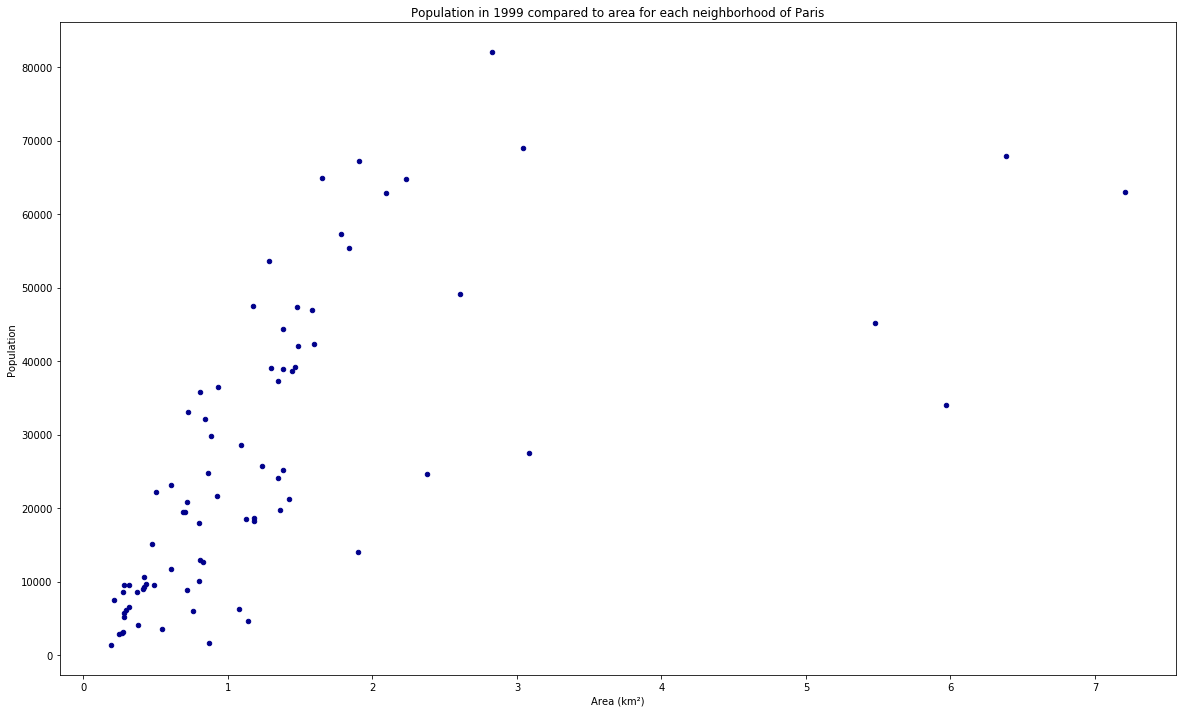

In [30]:
scatter_plot_df.plot(kind='scatter', x='Area', y='Population', figsize=(20, 12), color='darkblue')

plt.title('Population in 1999 compared to area for each neighborhood of Paris')
plt.xlabel('Area (km²)')
plt.ylabel('Population')

plt.show()

In [31]:
bar_chart_df = paris_neighborhoods[['Neighborhood', 'District', 'Population', 'Area']]
bar_chart_df.set_index(['District', 'Neighborhood'], inplace=True)

bar_chart_df['Density'] = bar_chart_df['Population'] / bar_chart_df['Area']

print('The dataframe shape is {}.'.format(bar_chart_df.shape))
bar_chart_df.head()

The dataframe shape is (80, 3).


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Population      Area       Density
District            Neighborhood                                      
6th arrondissement  Monnaie               6185  0.293361  21083.269477
                    Odéon                 8833  0.716148  12334.036638
8th arrondissement  Champs-Elysées        4614  1.140254   4046.466869
13th arrondissement Maison-Blanche       64797  2.231506  29037.343810
                    Croulebarbe          19526  0.692068  28214.002311

In [32]:
bar_chart_neighborhood_df = bar_chart_df[['Density']].sort_values(by=['Density'], ascending=True)

print('The dataframe shape is {}.'.format(bar_chart_neighborhood_df.shape))
bar_chart_neighborhood_df.head()

The dataframe shape is (80, 1).


,,Density
District,Neighborhood,
1st arrondissement,Saint-Germain-l'Auxerrois,1924.049162
8th arrondissement,Champs-Elysées,4046.466869
12th arrondissement,Bel-Air,5690.244910
7th arrondissement,Invalides,5845.024327
9th arrondissement,Chaussée-d'Antin,6418.358062


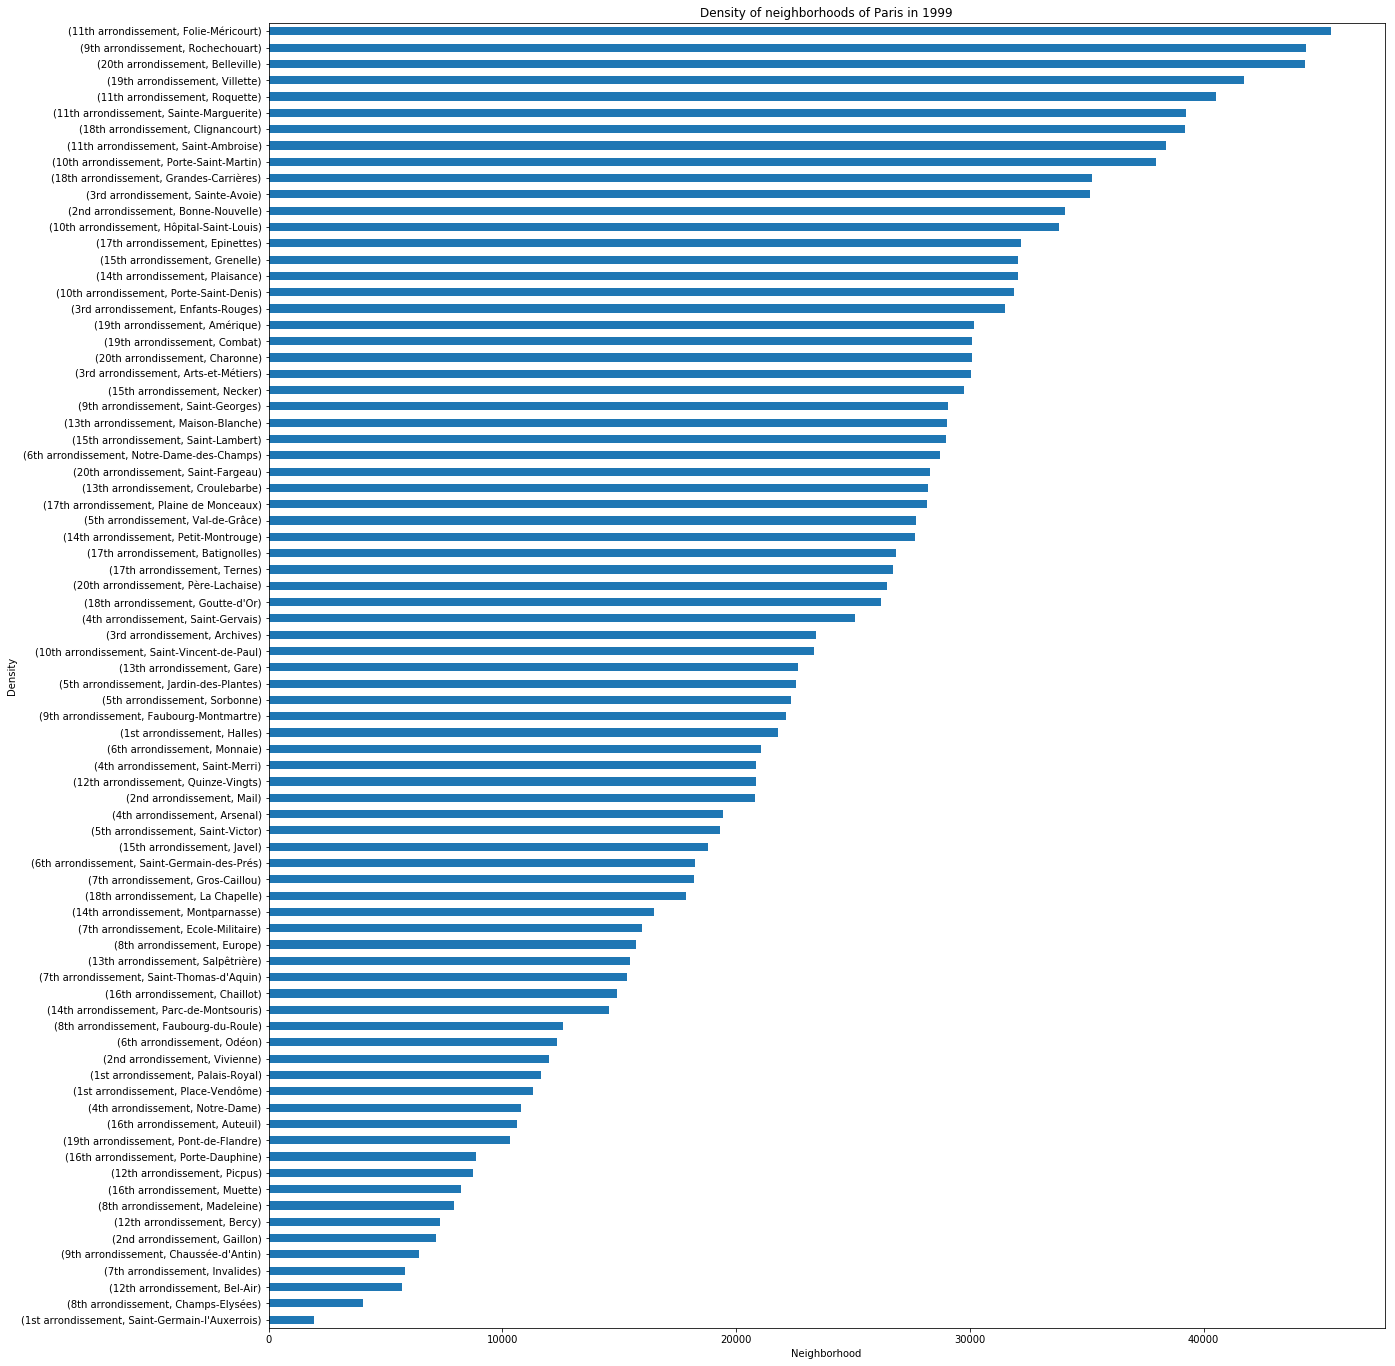

In [33]:
bar_chart_neighborhood_df.plot(kind='barh', figsize=(20, 24))

plt.xlabel('Neighborhood')
plt.ylabel('Density')
plt.title('Density of neighborhoods of Paris in 1999')
plt.legend().remove()

plt.show()

In [34]:
bar_chart_district_df = bar_chart_df.groupby('District').sum()
bar_chart_district_df['Density'] = bar_chart_district_df['Population'] / bar_chart_district_df['Area']
bar_chart_district_df = bar_chart_district_df[['Density']].sort_values(by=['Density'], ascending=True)

print('The dataframe shape is {}.'.format(bar_chart_district_df.shape))
bar_chart_district_df.head()

The dataframe shape is (20, 1).


,Density
District,
12th arrondissement,8376.574893
1st arrondissement,9259.499113
16th arrondissement,9883.439126
8th arrondissement,10129.543710
7th arrondissement,13933.301305


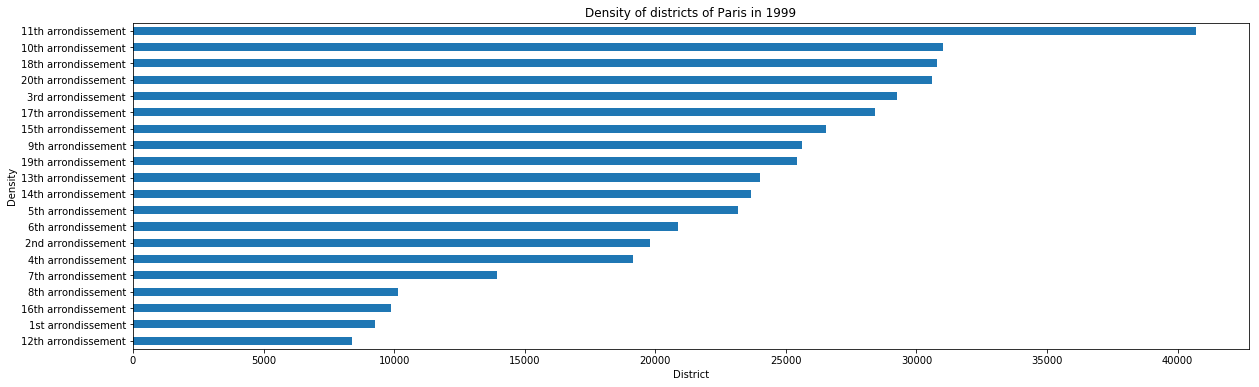

In [35]:
bar_chart_district_df.plot(kind='barh', figsize=(20, 6))

plt.xlabel('District')
plt.ylabel('Density')
plt.title('Density of districts of Paris in 1999')
plt.legend().remove()

plt.show()

## Analyse the localisation of seafood restaurants

In [36]:
def get_venues(latitude, longitude, category=FOURSQUARE_CATEGORY, radius=FOURSQUARE_RADIUS, limit=FOURSQUARE_LIMIT):
    url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}&intent=browse'.format(
            FOURSQUARE_CLIENT_ID, 
            FOURSQUARE_CLIENT_SECRET, 
            FOURSQUARE_VERSION, 
            latitude, 
            longitude,
            category,
            radius, 
            limit)
    
    results = requests.get(url).json()
    
    venues = []
    for venue in results['response']['venues']:
        try:
            id = venue['id']
            name = venue['name']
            latitude = venue['location']['lat']
            longitude = venue['location']['lng']
            venues.append([id, name, latitude, longitude])
        except KeyError:
            pass
    
    columns = ['id', 'Name', 'Latitude', 'Longitude']
    
    df = pd.DataFrame(venues,columns=columns)
    return df

In [37]:
venues = None

if FOURSQUARE_UPDATE:
    for id, neighborhood in paris_neighborhoods.iterrows():
        venues_neighborhood = get_venues(neighborhood['Latitude'], neighborhood['Longitude'])
        venues = pd.concat([venues, venues_neighborhood], ignore_index=True, sort=False)
    venues.drop_duplicates(subset='id', keep='first', inplace=True) 
    project.save_data(file_name='venues.csv', data=venues.to_csv(index=False), overwrite=True)
    print('File venues.csv saved.')
else:
    venues_file = project.get_file('venues.csv')
    venues = pd.read_csv(venues_file)
    print('File venues.csv loaded.')

print('The dataframe shape is {}.'.format(venues.shape))
venues.head()

File venues.csv loaded.
The dataframe shape is (189, 4).


,id,Name,Latitude,Longitude
0,539a1714498e914689267233,La Criée,48.847991,2.348145
1,52f410b7498e6ecf60c0d4a7,Bar à Iode,48.849600,2.351608
2,5a7b5fc3898bdc101cd4486b,Homer Lobster,48.860706,2.354744
3,5954163f3ba76773801a02ba,Ostrea,48.861206,2.342601
4,4ea456aa61af76b39d5803a1,La Belle de Liron,48.866846,2.347244


In [38]:
venues.dtypes

id            object
Name          object
Latitude     float64
Longitude    float64
dtype: object

In [39]:
venues.describe()

,Latitude,Longitude
count,189.000000,189.000000
mean,48.861465,2.330261
std,0.016912,0.031417
min,48.815160,2.239556
25%,48.850952,2.313317
50%,48.862078,2.333255
75%,48.874305,2.351608
max,48.902006,2.407587


In [40]:
try:
    from shapely.geometry import Point, shape
except:
    print('shapely not installed, installing folium.')
    !conda install -c conda-forge shapely
    print('shapely installed.')
    from shapely.geometry import Point, shape
print('shapely.geometry imported.')

print('All libraries imported.')

shapely.geometry imported.
All libraries imported.


In [41]:
seafood_restaurants_paris = pd.DataFrame(columns=['id', 'Name', 'Latitude', 'Longitude', 'NeighborhoodCode'])

paris_neighborhoods_geo_file = project.get_file('paris_neighborhoods_geo.json')
paris_neighborhoods_geo = pd.read_json(paris_neighborhoods_geo_file)
print('File paris_neighborhoods_geo.json loaded.')

for id, venue in venues.iterrows():
    venue_location = Point(venue['Longitude'], venue['Latitude'])

    for feature in paris_neighborhoods_geo['features']:
        neighborhood = shape(feature['geometry'])
        if venue_location.within(neighborhood):
            seafood_restaurants_paris = seafood_restaurants_paris.append({'id': venue['id'], 'Name': venue['Name'], 'Latitude': venue['Latitude'], 'Longitude': venue['Longitude'], 'NeighborhoodCode': feature['properties']['c_quinsee']}, ignore_index=True, sort=False)
            break

print('The dataframe shape is {}.'.format(seafood_restaurants_paris.shape))
seafood_restaurants_paris.head()

File paris_neighborhoods_geo.json loaded.
The dataframe shape is (180, 5).


,id,Name,Latitude,Longitude,NeighborhoodCode
0,539a1714498e914689267233,La Criée,48.847991,2.348145,7510504
1,52f410b7498e6ecf60c0d4a7,Bar à Iode,48.849600,2.351608,7510501
2,5a7b5fc3898bdc101cd4486b,Homer Lobster,48.860706,2.354744,7510401
3,5954163f3ba76773801a02ba,Ostrea,48.861206,2.342601,7510102
4,4ea456aa61af76b39d5803a1,La Belle de Liron,48.866846,2.347244,7510203


In [42]:
project.save_data(file_name='seafood_restaurants_paris.csv', data=seafood_restaurants_paris.to_csv(index=False), overwrite=True)
print('File seafood_restaurants_paris.csv saved.')

File seafood_restaurants_paris.csv saved.


In [43]:
seafood_restaurants = folium.map.FeatureGroup()

for latitude, longitude, venueName in seafood_restaurants_paris[['Latitude', 'Longitude', 'Name']].values:
    seafood_restaurants.add_child(
        folium.CircleMarker(
            [latitude, longitude],
            radius=5,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            popup=venueName
        )
    )
    
paris_map.add_child(seafood_restaurants)

paris_map

In [44]:
bar_chart_df = pd.merge(paris_neighborhoods[['NeighborhoodCode', 'Neighborhood', 'District',]], seafood_restaurants_paris[['NeighborhoodCode', 'id']], on='NeighborhoodCode', how='outer')
bar_chart_df.drop(['NeighborhoodCode'], axis='columns', inplace=True)
bar_chart_df.set_index(['District', 'Neighborhood'], inplace=True)

print('The dataframe shape is {}.'.format(bar_chart_df.shape))
bar_chart_df.head()

The dataframe shape is (196, 1).


id
District           Neighborhood                          
6th arrondissement Monnaie       577aa48c38fad73635678a7f
                   Monnaie       56b5ba26498e6f4bddd43f39
                   Monnaie       4adcda14f964a5203e3721e3
                   Monnaie       4e18b750fa761946459459d2
                   Monnaie       5d2ac7e7605f260023aa8218

In [45]:
bar_chart_neighborhood_df = bar_chart_df.groupby(['District', 'Neighborhood']).count()
bar_chart_neighborhood_df.rename(columns={'id': 'VenueCount'}, inplace=True)
bar_chart_neighborhood_df = bar_chart_neighborhood_df.sort_values(by=['VenueCount'], ascending=True)

print('The dataframe shape is {}.'.format(bar_chart_neighborhood_df.shape))
bar_chart_neighborhood_df.head()

The dataframe shape is (80, 1).


,,VenueCount
District,Neighborhood,
10th arrondissement,Hôpital-Saint-Louis,0
1st arrondissement,Saint-Germain-l'Auxerrois,0
2nd arrondissement,Vivienne,0
17th arrondissement,Epinettes,0
4th arrondissement,Notre-Dame,0


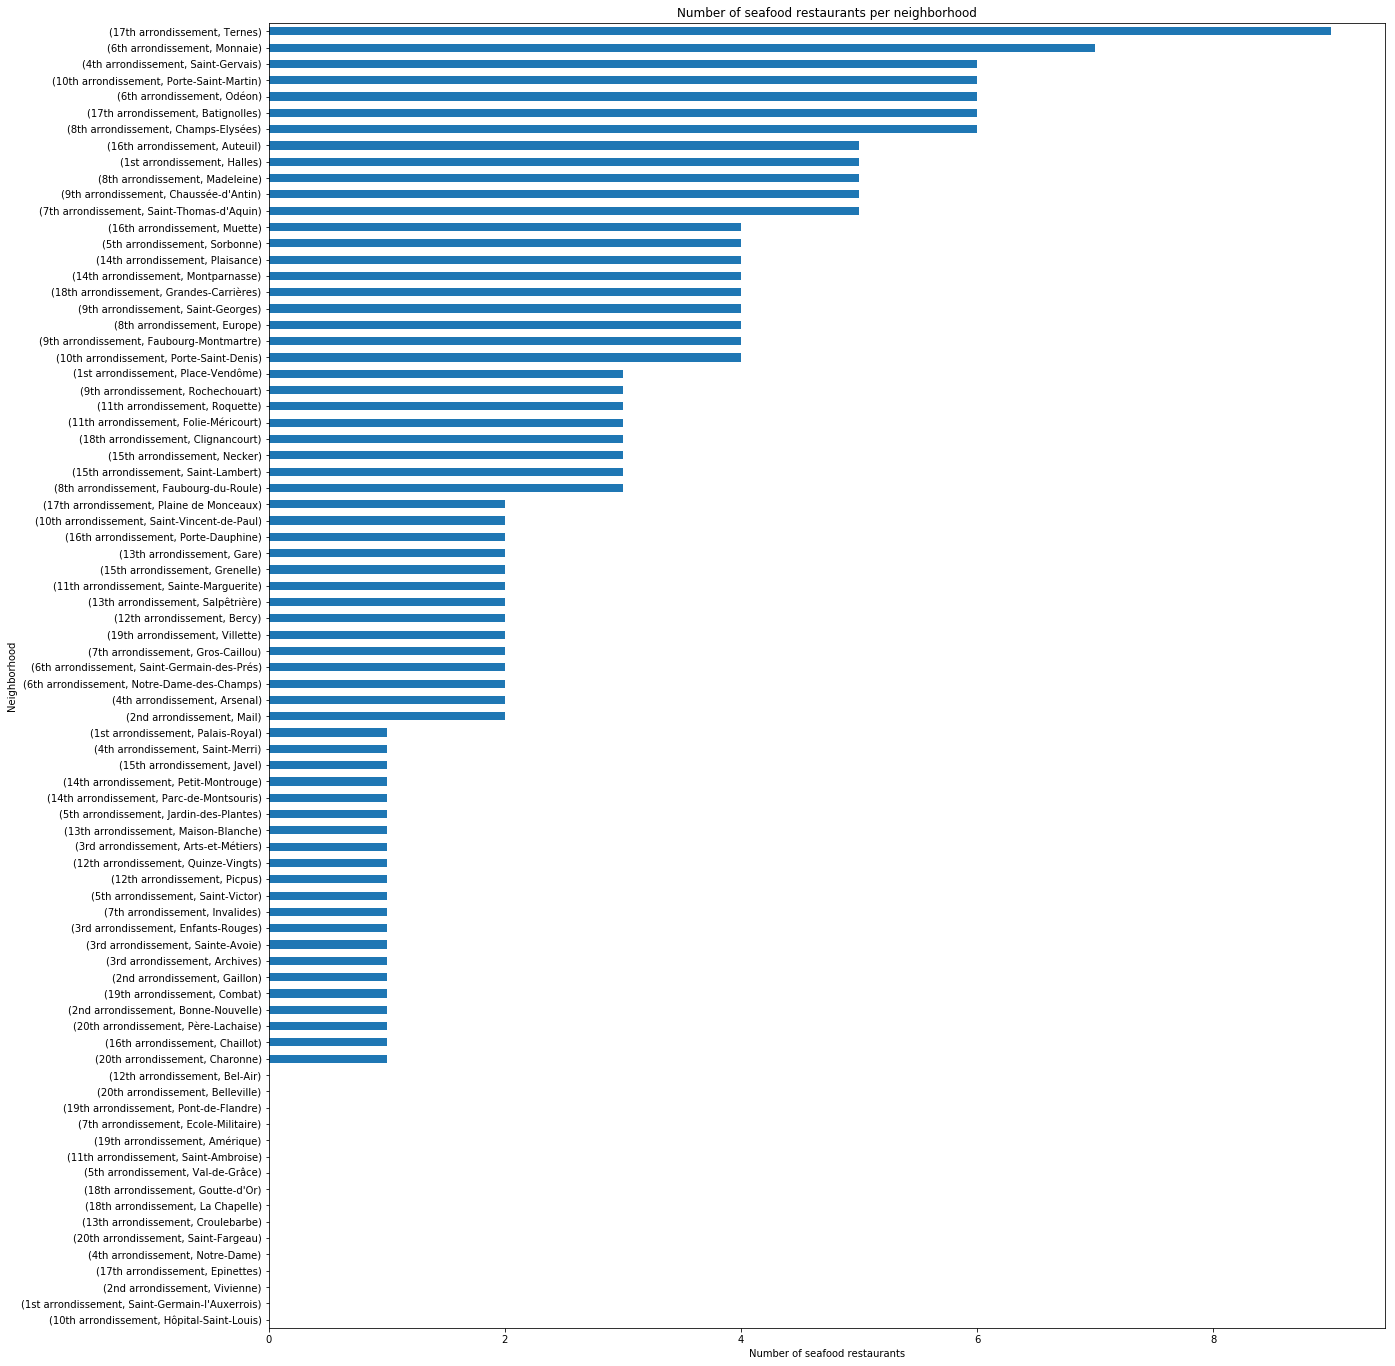

In [46]:
bar_chart_neighborhood_df.plot(kind='barh', figsize=(20, 24))

plt.xlabel('Number of seafood restaurants')
plt.ylabel('Neighborhood')
plt.title('Number of seafood restaurants per neighborhood')
plt.legend().remove()

plt.show()

In [47]:
bar_chart_neighborhood_df2 = pd.merge(bar_chart_neighborhood_df, paris_neighborhoods, on='Neighborhood')
bar_chart_neighborhood_df2 = bar_chart_neighborhood_df2[['Neighborhood', 'VenueCount', 'District', 'Population']]
bar_chart_neighborhood_df2['VenuePerMillionInhabitants'] = bar_chart_neighborhood_df2['VenueCount'] / bar_chart_neighborhood_df2['Population'] * 1e6
bar_chart_neighborhood_df2 = bar_chart_neighborhood_df2[['Neighborhood', 'VenuePerMillionInhabitants', 'District']]
bar_chart_neighborhood_df2.set_index(['District', 'Neighborhood'], inplace=True)
bar_chart_neighborhood_df2 = bar_chart_neighborhood_df2.sort_values(by=['VenuePerMillionInhabitants'], ascending=True)

print('The dataframe shape is {}.'.format(bar_chart_neighborhood_df2.shape))
bar_chart_neighborhood_df2.head()

The dataframe shape is (80, 1).


,,VenuePerMillionInhabitants
District,Neighborhood,
10th arrondissement,Hôpital-Saint-Louis,0.0
12th arrondissement,Bel-Air,0.0
20th arrondissement,Belleville,0.0
19th arrondissement,Pont-de-Flandre,0.0
7th arrondissement,Ecole-Militaire,0.0


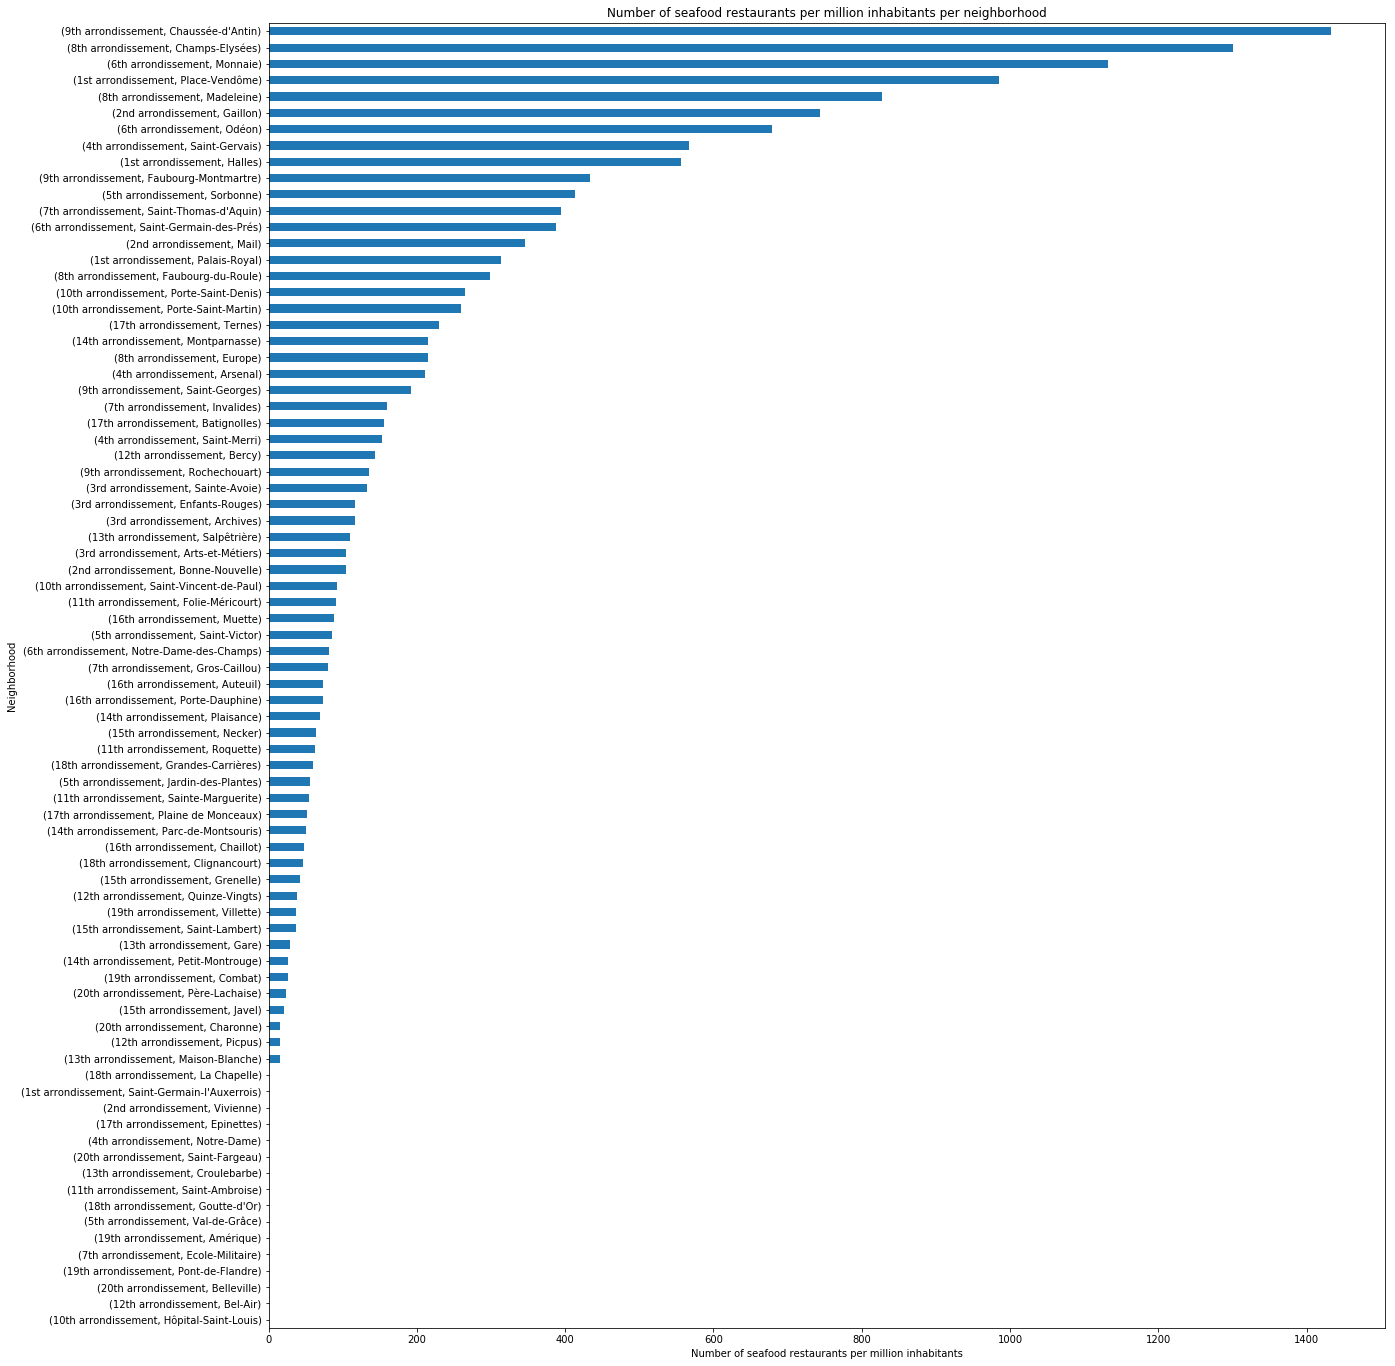

In [48]:
bar_chart_neighborhood_df2.plot(kind='barh', figsize=(20, 24))

plt.xlabel('Number of seafood restaurants per million inhabitants')
plt.ylabel('Neighborhood')
plt.title('Number of seafood restaurants per million inhabitants per neighborhood')
plt.legend().remove()

plt.show()

In [49]:
bar_chart_district_df = bar_chart_df.groupby(['District']).count()
bar_chart_district_df.rename(columns={'id': 'VenueCount'}, inplace=True)
bar_chart_district_df = bar_chart_district_df.sort_values(by=['VenueCount'], ascending=True)

print('The dataframe shape is {}.'.format(bar_chart_district_df.shape))
bar_chart_district_df.head()

The dataframe shape is (20, 1).


,VenueCount
District,
20th arrondissement,2
19th arrondissement,3
12th arrondissement,4
2nd arrondissement,4
3rd arrondissement,4


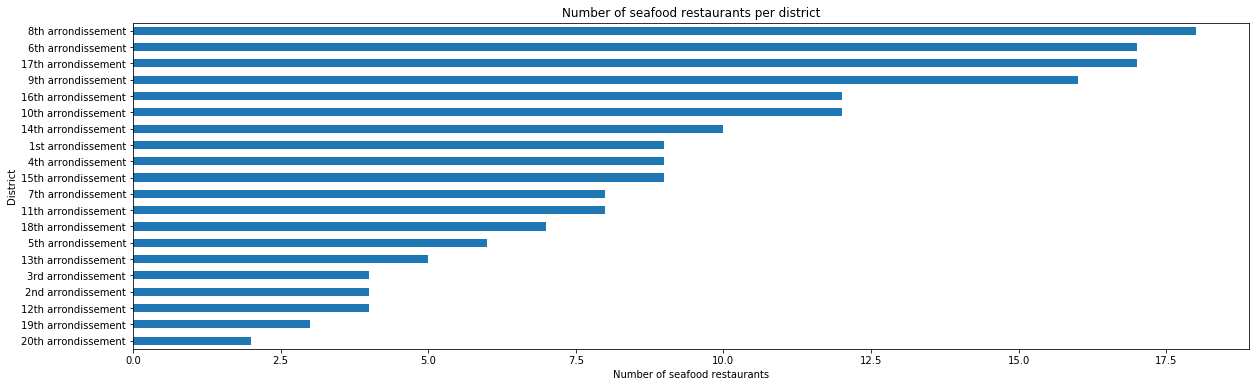

In [50]:
bar_chart_district_df.plot(kind='barh', figsize=(20, 6))

plt.xlabel('Number of seafood restaurants')
plt.ylabel('District')
plt.title('Number of seafood restaurants per district')
plt.legend().remove()

plt.show()

In [51]:
bar_chart_district_df2 = pd.merge(bar_chart_neighborhood_df, paris_neighborhoods, on='Neighborhood')
bar_chart_district_df2 = bar_chart_district_df2[['VenueCount', 'District', 'Population']]
bar_chart_district_df2 = bar_chart_district_df2.groupby(['District']).sum()
bar_chart_district_df2['VenuePerMillionInhabitants'] = bar_chart_district_df2['VenueCount'] / bar_chart_district_df2['Population'] * 1e6
bar_chart_district_df2 = bar_chart_district_df2[['VenuePerMillionInhabitants']]
bar_chart_district_df2 = bar_chart_district_df2.sort_values(by=['VenuePerMillionInhabitants'], ascending=True)

print('The dataframe shape is {}.'.format(bar_chart_district_df2.shape))
bar_chart_district_df2.head()

The dataframe shape is (20, 1).


,VenuePerMillionInhabitants
District,
20th arrondissement,10.923411
19th arrondissement,17.382538
13th arrondissement,29.141435
12th arrondissement,29.269292
18th arrondissement,37.923730


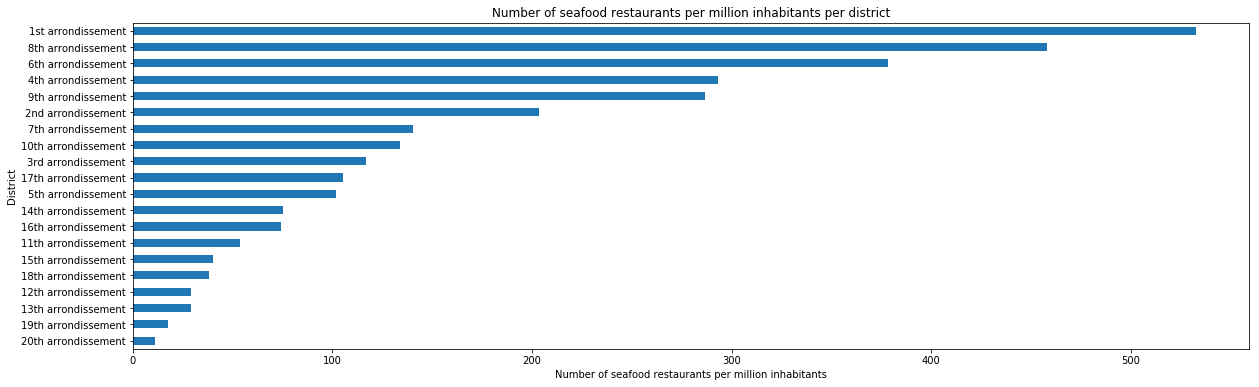

In [52]:
bar_chart_district_df2.plot(kind='barh', figsize=(20, 6))

plt.xlabel('Number of seafood restaurants per million inhabitants')
plt.ylabel('District')
plt.title('Number of seafood restaurants per million inhabitants per district')
plt.legend().remove()

plt.show()

## More details regarding seafood restaurants

In [69]:
def get_venue_details(venue_id, category=FOURSQUARE_CATEGORY):
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            FOURSQUARE_CLIENT_ID, 
            FOURSQUARE_CLIENT_SECRET, 
            FOURSQUARE_VERSION)

    results = requests.get(url).json()
    venue_data = results['response']['venue']
    
    try:
        name = venue_data['name']
    except KeyError:
        name = np.nan
    
    try:
        price = venue_data['price']['tier']
    except KeyError:
        price = np.nan
    
    try:
        price_description = venue_data['price']['message']
    except KeyError:
        price_description = np.nan
    
    try:
        rating = venue_data['rating']
    except KeyError:
        rating = np.nan
        
    try:
        likes = venue_data['likes']['count']
    except KeyError:
        likes = np.nan
    
    try:
        tips_count = venue_data['tips']['count']
    except KeyError:
        tips_count = np.nan
    
    try:
        if category is not None:
            is_primary_category = False
            for venue_category in venue_data['categories']:
                if venue_category['id'] == category and venue_category['primary'] is True:
                    is_primary_category = True
        else:
            is_primary_category = np.nan;
    except KeyError:
        is_primary_category = np.nan
        
    venue = {'id': venue_id, 'Name': name, 'Price': price, 'PriceDescription': price_description, 'Rating': rating, 'Likes': likes, 'TipsCount': tips_count, 'IsPrimaryCategory': is_primary_category}

    return venue

In [70]:
seafood_restaurants_paris_details = pd.DataFrame(columns=['id', 'Name', 'Latitude', 'Longitude', 'Price', 'PriceDescription', 'Rating', 'Likes', 'TipsCount', 'IsPrimaryCategory', 'NeighborhoodCode'])

seafood_restaurants_paris_file = project.get_file('seafood_restaurants_paris.csv')
seafood_restaurants_paris = pd.read_csv(seafood_restaurants_paris_file)
print('File seafood_restaurants_paris.csv loaded.')

if FOURSQUARE_UPDATE:
    for restaurant_id, restaurant in seafood_restaurants_paris.iterrows():
        venue_details = get_venue_details(restaurant['id'])
        seafood_restaurants_paris_details = seafood_restaurants_paris_details.append({'id': restaurant['id'], 'Name': venue_details['Name'], 'Latitude': restaurant['Latitude'], 'Longitude': restaurant['Longitude'], 'Price': venue_details['Price'], 'PriceDescription': venue_details['PriceDescription'], 'Rating': venue_details['Rating'], 'Likes': venue_details['Likes'], 'TipsCount': venue_details['TipsCount'], 'IsPrimaryCategory': venue_details['IsPrimaryCategory'], 'NeighborhoodCode': restaurant['NeighborhoodCode']}, ignore_index=True, sort=False)
        
    project.save_data(file_name='seafood_restaurants_paris_details.csv', data=seafood_restaurants_paris_details.to_csv(index=False), overwrite=True)
    print('File seafood_restaurants_paris_details.csv saved.')
else:
    seafood_restaurants_paris_details_file = project.get_file('seafood_restaurants_paris_details.csv')
    seafood_restaurants_paris_details = pd.read_csv(seafood_restaurants_paris_details_file)
    print('File seafood_restaurants_paris_details.csv loaded.')

print('The dataframe shape is {}.'.format(seafood_restaurants_paris_details.shape))
seafood_restaurants_paris_details.head()

File seafood_restaurants_paris.csv loaded.


KeyError: 'venue'